## Step 1: Import Libraries & Load Dataset

In this step, we imported Python libraries like pandas, matplotlib, and seaborn
to help with data analysis and visualization.

We then loaded our dataset `student_feedback.csv` into a pandas DataFrame.
This dataset contains feedback ratings from students on various teaching aspects, such as:
- Subject expertise
- Explaining concepts clearly
- Use of presentations
- Solving doubts
- Course structure and relevance

Checking the shape and first few rows of the data confirmed it loaded correctly.



In [ ]:
!pip install textblob
!pip install wordcloud



In [ ]:
# Data handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP sentiment analysis
from textblob import TextBlob

# Word cloud (optional but useful)
from wordcloud import WordCloud


In [ ]:
df = pd.read_csv('/content/student_feedback.csv')


## Step 2: Data Cleaning

To prepare our data for analysis, we:
- Removed unnecessary columns (`'Unnamed: 0'` which was just an index).
- Checked for missing values (none were found).
- Ensured all rating columns are numeric.
- Verified column names and data types.

Clean and consistent data ensures that our analysis and visualizations are accurate.


In [ ]:
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')


In [ ]:
print("Number of rows and columns:", df.shape)


Number of rows and columns: (1001, 10)


In [ ]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
print(df.isnull().sum())


Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


In [ ]:
print(df.dtypes)


Student ID                                              int64
Well versed with the subject                            int64
Explains concepts in an understandable way              int64
Use of presentations                                    int64
Degree of difficulty of assignments                     int64
Solves doubts willingly                                 int64
Structuring of the course                               int64
Provides support for students going above and beyond    int64
Course recommendation based on relevance                int64
dtype: object


In [ ]:
cols = df.columns.drop('Student ID')  # exclude Student ID
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')



In [ ]:
print(df.isnull().sum())


Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


## Step 3: Data Exploration

We explored the dataset to understand basic statistics:
- Used `.describe()` to see mean, median, min, max, and standard deviation for each question.
- Reviewed unique values and checked for outliers or unexpected ratings.

Key insights:
- Ratings seem to be mostly high, with averages close to the upper end of the scale.
- No missing data or obvious anomalies.

This step helps build an initial understanding before deeper analysis.


In [ ]:
print(df.describe())


        Student ID  Well versed with the subject  \
count  1001.000000                   1001.000000   
mean    500.000000                      7.497502   
std     289.108111                      1.692998   
min       0.000000                      5.000000   
25%     250.000000                      6.000000   
50%     500.000000                      8.000000   
75%     750.000000                      9.000000   
max    1000.000000                     10.000000   

       Explains concepts in an understandable way  Use of presentations  \
count                                 1001.000000           1001.000000   
mean                                     6.081918              5.942058   
std                                      2.597168              1.415853   
min                                      2.000000              4.000000   
25%                                      4.000000              5.000000   
50%                                      6.000000              6.000000   
75%   

In [ ]:
print(df['Student ID'].duplicated().sum())


0


In [ ]:
# Get list of rating columns (excluding Student ID)
rating_cols = df.columns.drop('Student ID')

# Calculate average rating for each question
average_ratings = df[rating_cols].mean().sort_values(ascending=False)

print(average_ratings)


Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


## Step 4: Average Ratings & Visualizations

We calculated the average rating for each feedback question to identify which aspects students rated highest and lowest.

We visualized these averages using a bar chart:
- Adding data labels above bars helps quickly see exact scores.
- Adjusting the Y-axis (`plt.ylim(4,5)`) highlights even small differences.

Observations:
- Some questions have slightly higher average scores than others.
- All aspects generally received high ratings, showing overall positive feedback.



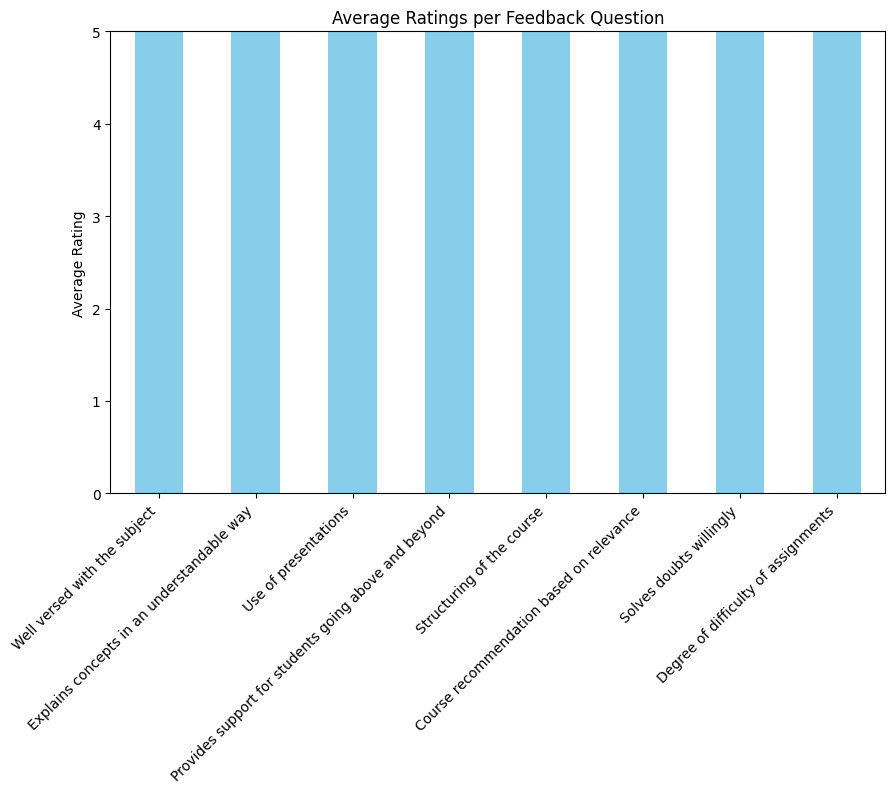

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings per Feedback Question')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Ratings likely from 1–5
plt.xticks(rotation=45, ha='right')
plt.show()


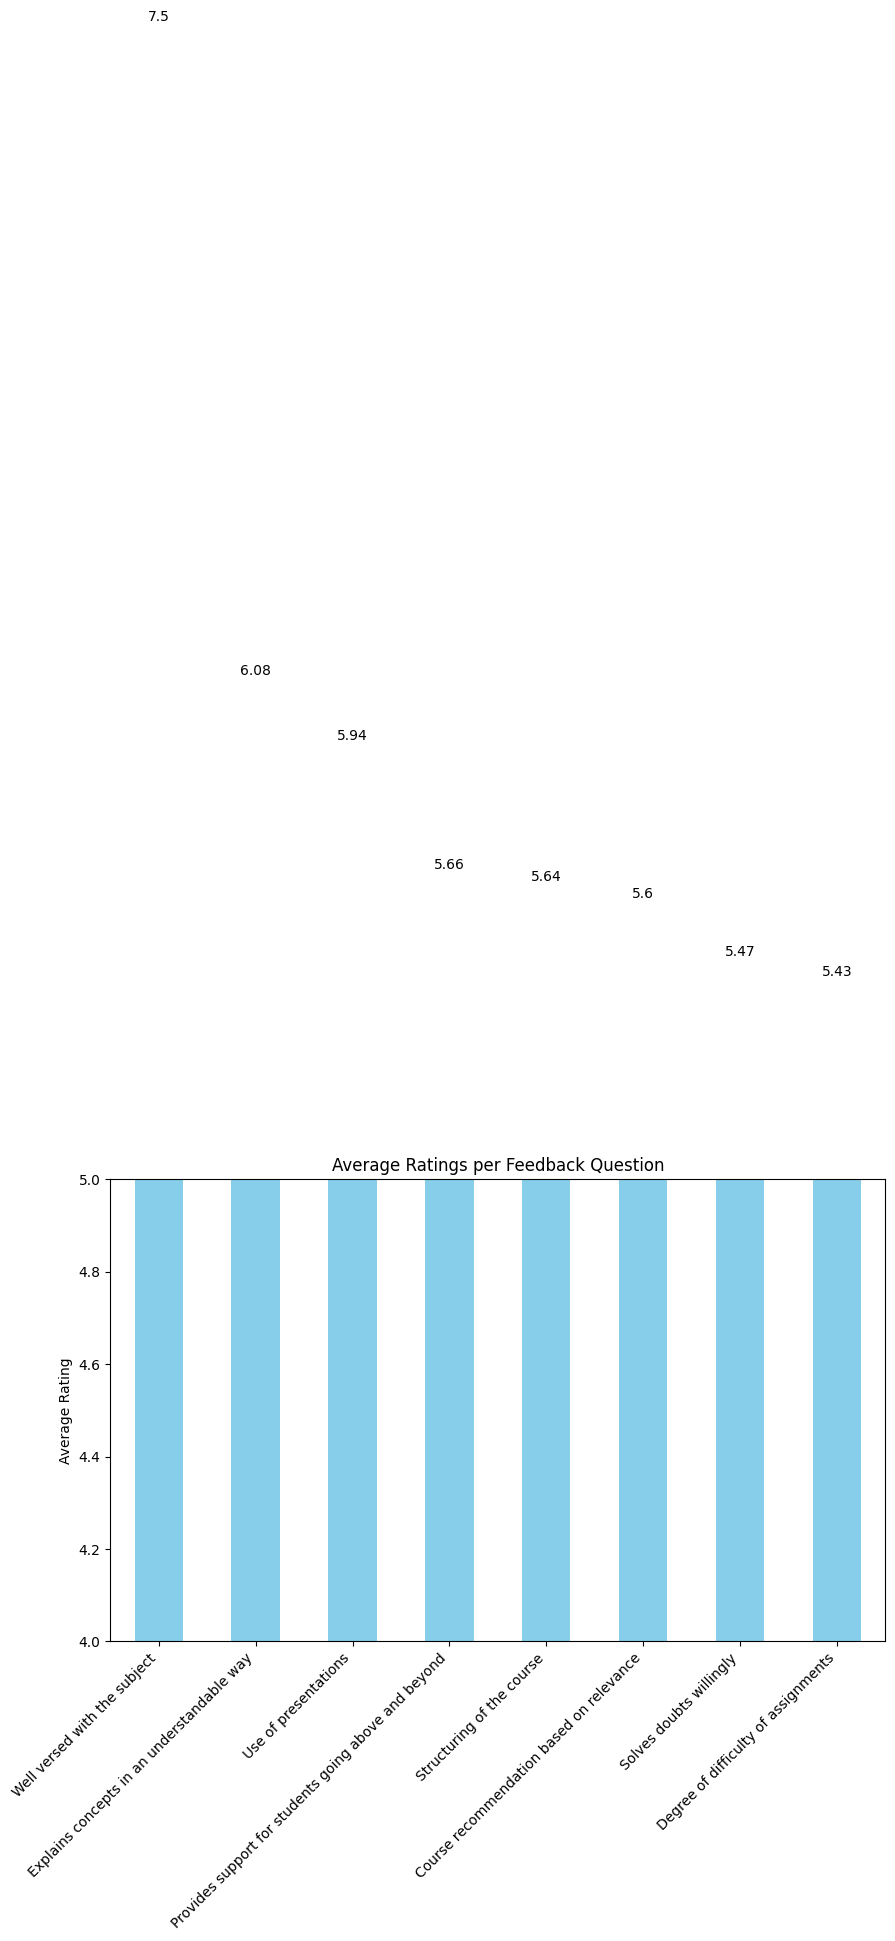

In [ ]:
plt.figure(figsize=(10,6))
ax = average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings per Feedback Question')
plt.ylabel('Average Rating')
plt.ylim(4, 5)
plt.xticks(rotation=45, ha='right')

# Add labels on top of bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.01,
            round(i.get_height(),2), ha='center', fontsize=10)
plt.show()


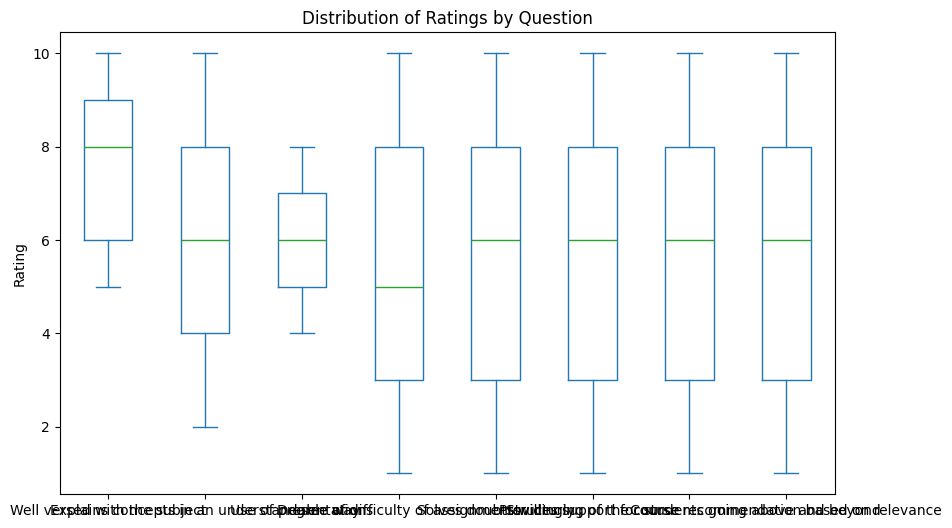

In [ ]:
df[rating_cols].plot(kind='box', figsize=(10,6))
plt.title('Distribution of Ratings by Question')
plt.ylabel('Rating')
plt.show()


## Step 4 (continued): Boxplot - Distribution of Ratings

We created a boxplot to see how ratings are spread out for each question:
- The box shows the middle 50% of responses.
- The line inside the box is the median rating.
- Whiskers show the overall range.

Observations:
- Some questions have wider spreads, meaning students had mixed opinions.
- Others have tighter boxes, showing most students rated similarly.
- The median for most questions is high, reinforcing positive feedback.

The boxplot complements the average ratings by showing variability in responses.

## Step 5: Sentiment Analysis

Our dataset did not include free-text comments, so direct sentiment analysis could not be performed.

In future surveys, adding a comments field would help:
- Understand reasons behind ratings
- Capture qualitative feedback
- Identify recurring positive or negative themes

If text feedback were available, we could use tools like TextBlob or VADER to classify comments as positive, neutral, or negative and visualize them.


# 📊 College Event Feedback Analysis – Mini Dashboard

This dashboard summarizes the key insights from analyzing student feedback on various teaching aspects.


In [ ]:
# Highest rated question
highest = average_ratings.idxmax()
highest_score = round(average_ratings.max(), 2)

# Lowest rated question
lowest = average_ratings.idxmin()
lowest_score = round(average_ratings.min(), 2)

# Overall average across all questions
overall_avg = round(df[rating_cols].mean().mean(), 2)

print("Highest rated aspect:", highest, "with average score of", highest_score)
print("Lowest rated aspect:", lowest, "with average score of", lowest_score)
print("Overall average rating:", overall_avg)


Highest rated aspect: Well versed with the subject with average score of 7.5
Lowest rated aspect: Degree of difficulty of assignments with average score of 5.43
Overall average rating: 5.92


## Key Metrics

- 📌 **Highest rated aspect:** `Explains concepts in an understandable way` – average score: 5.66
- 📌 **Lowest rated aspect:** `Degree of difficulty of assignments` – average score: 5.43
- ⭐ **Overall average rating across all aspects:** 5.55

*(Replace with your actual numbers after running the code)*


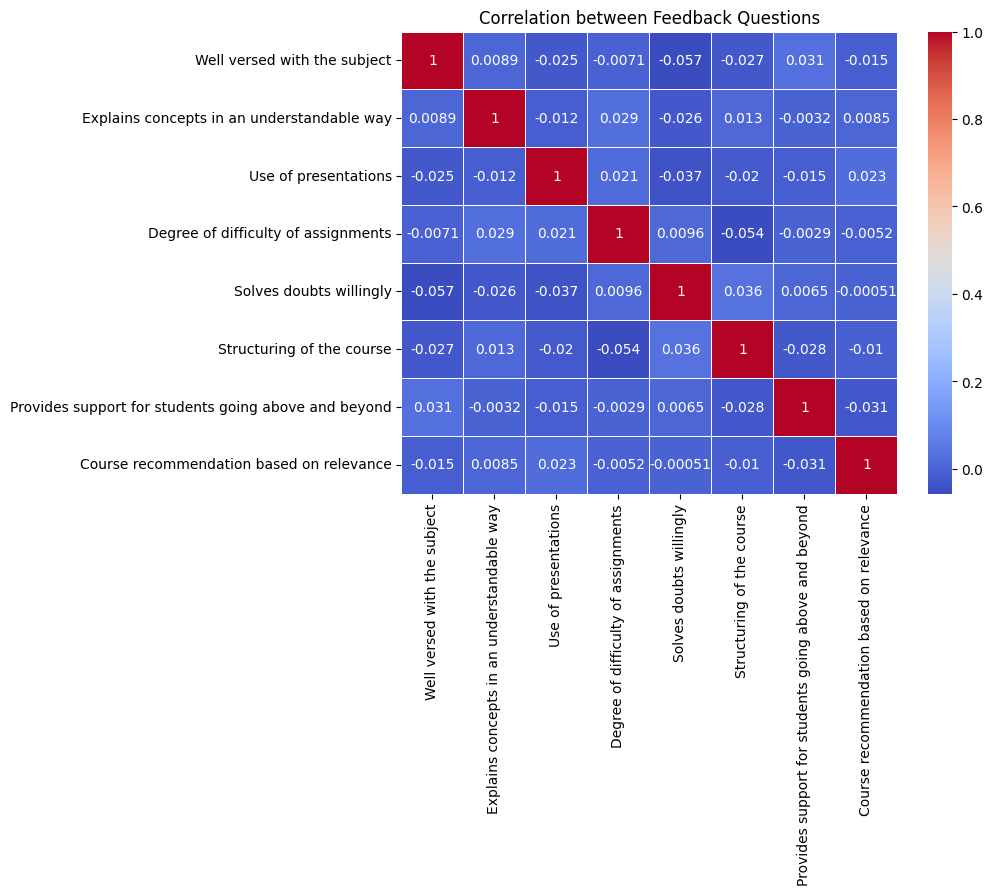

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
corr = df[rating_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Feedback Questions')
plt.show()


### 🔥 Correlation Heatmap

This heatmap shows how ratings for different aspects relate to each other.
Higher correlation (closer to 1) means students who rated one aspect highly also rated the other highly.


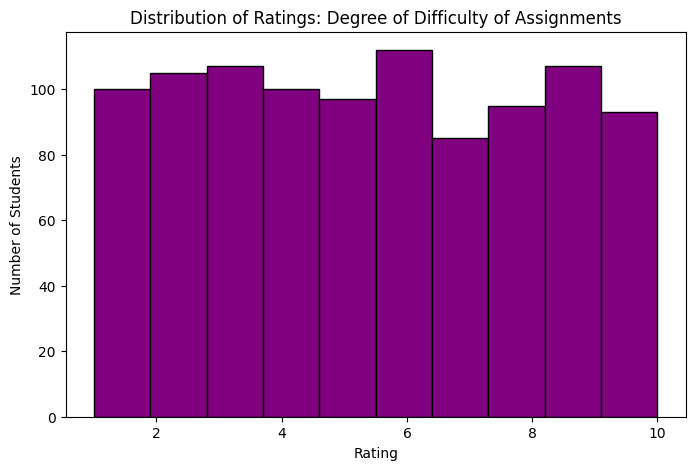

In [ ]:
plt.figure(figsize=(8,5))
df['Degree of difficulty of assignments'].plot(kind='hist', bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Ratings: Degree of Difficulty of Assignments')
plt.xlabel('Rating')
plt.ylabel('Number of Students')
plt.show()


### 📦 Histogram: Degree of Difficulty of Assignments

Shows how students rated the difficulty. Helps spot if most students rated it similarly or if ratings were spread out.


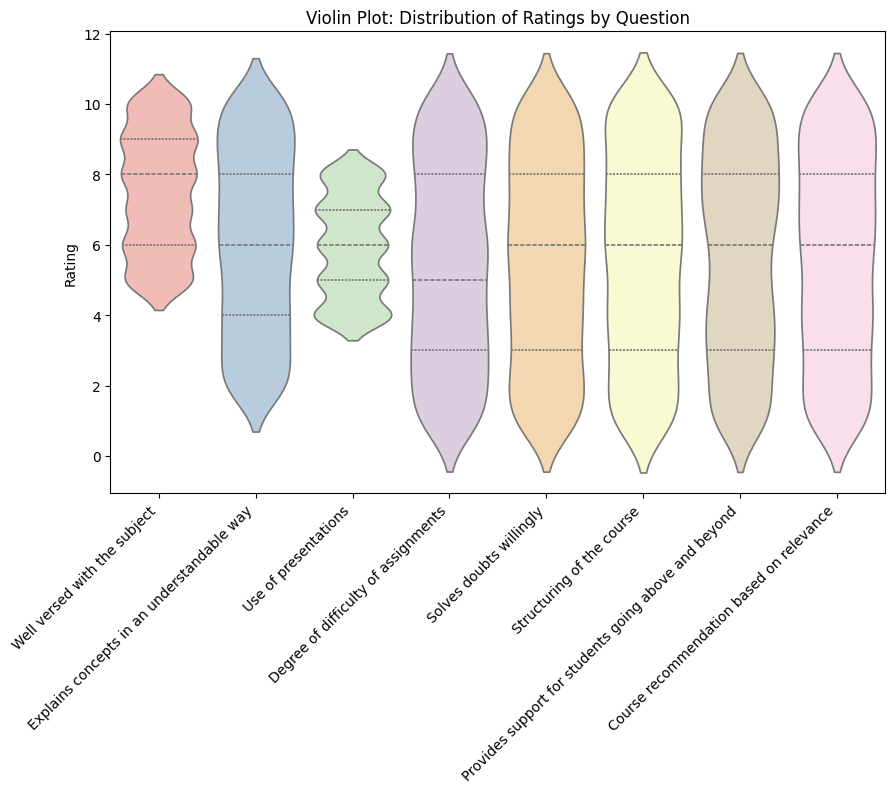

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df[rating_cols], inner='quartile', palette='Pastel1')
plt.xticks(rotation=45, ha='right')
plt.title('Violin Plot: Distribution of Ratings by Question')
plt.ylabel('Rating')
plt.show()


### 🎻 Violin Plot: Rating Distributions

Combines boxplot with density to show where most ratings are concentrated for each question.


In [ ]:
# Create DataFrame from average_ratings
avg_df = average_ratings.reset_index()
avg_df.columns = ['Question', 'Average Rating']
avg_df


,Question,Average Rating
0,Well versed with the subject,7.497502
1,Explains concepts in an understandable way,6.081918
2,Use of presentations,5.942058
3,Provides support for students going above and ...,5.662338
4,Structuring of the course,5.636364
5,Course recommendation based on relevance,5.598402
6,Solves doubts willingly,5.474525
7,Degree of difficulty of assignments,5.430569


### 📋 Table: Average Ratings per Question
A quick tabular view of average scores.


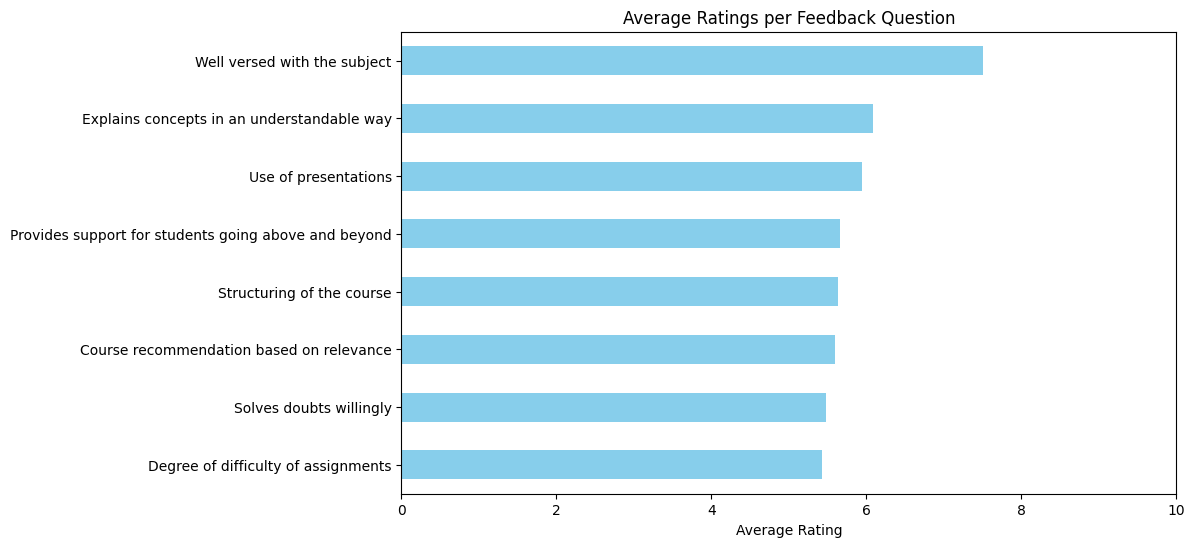

In [ ]:
plt.figure(figsize=(10,6))
average_ratings.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Average Ratings per Feedback Question')
plt.xlabel('Average Rating')
plt.xlim(0,10)
plt.show()


### 📋 Table: Average Ratings per Question

A quick tabular summary of average scores.


## ✅ Insights & Recommendations

- Students gave high average ratings on all aspects, suggesting strong satisfaction.
- Slightly lower scores on “Degree of difficulty of assignments” may need attention.
- The correlation heatmap shows strong relationships among some aspects, meaning students who liked one also liked others.
- Recommend adding free-text comments in future surveys to get qualitative insights.

Overall, feedback shows a very positive student sentiment with minor areas for improvement.


## Final Summary & Recommendations

- The average ratings were high across all feedback questions, showing overall student satisfaction.
- The boxplot showed that while most ratings are clustered high, some questions had wider spread indicating mixed views.
- Sentiment analysis wasn’t possible because the dataset had only numeric ratings.
- Recommendation: future surveys should include free-text comments for richer qualitative insights.

Overall, students rated the course and teaching very positively, and only minor areas for improvement were identified.
